<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
%pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8127280d640ec2b8a973d4c5a80a45245d65ae2bea85f543b862ea89a2bd944b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re
pd.options.mode.chained_assignment = None
random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Для воспроизводимости результатов и независимости от рандома`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train.drop('selling_price', axis=1).to_csv('train.csv')

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [5]:
print(f'Количество дубликатов значений: {df_train.duplicated().sum()}')
print(f'Количество пропущенных значений: \n{df_train.isnull().sum()[df_train.isnull().sum() > 0]}')

Количество дубликатов значений: 985
Количество пропущенных значений: 
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


In [6]:
print(f'Количество дубликатов значений: {df_test.duplicated().sum()}')
print(f'Количество пропущенных значений: \n{df_test.isnull().sum()[df_test.isnull().sum() > 0]}')

Количество дубликатов значений: 62
Количество пропущенных значений: 
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [7]:
profile = ProfileReport(df_train, title="Профиль данных")

profile.to_file("data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [8]:
train_numeric_stats = df_train.describe()
test_numeric_stats = df_test.describe()

print("Статистики по числовым столбцам для трейна:")
print(train_numeric_stats)
print("\nСтатистики по числовым столбцам для теста:")
print(test_numeric_stats)

Статистики по числовым столбцам для трейна:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Статистики по числовым столбцам для теста:
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.0000

`Средние и медианы для всех числовых столбцов в трейне и тесте достаточно близки, что указывает на схожесть распределений данных в обоих наборах.`

In [9]:
train_categorical_stats = df_train.describe(include=['O'])
test_categorical_stats = df_test.describe(include=['O'])

print("Статистики по категориальным столбцам для трейна:")
print(train_categorical_stats)
print("\nСтатистики по категориальным столбцам для теста:")
print(test_categorical_stats)

Статистики по категориальным столбцам для трейна:
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  

Статистики по категориальным столбцам для теста:
                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2          

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [10]:
features = df_train.drop(columns=['selling_price'])

duplicates = features.duplicated()

num_duplicates = duplicates.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")
df_train[duplicates].head(5)

Количество объектов с одинаковым признаковым описанием: 1159


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


In [11]:
df_train = df_train.drop_duplicates(subset=features.columns, keep='first')
df_train = df_train.reset_index(drop=True)

In [12]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [13]:
def extract_units(el):
  if el and (not pd.isna(el)):
    raw_unit = re.findall('[a-zA-Z/]+', el)
    if raw_unit:
      return raw_unit[0]
  return

In [14]:
def to_float(el):
  if el and (not pd.isna(el)):
    raw_d = re.findall(r'\b\d+\.\d+|\d+\b', el)
    if raw_d:
      return float(raw_d[0])
  return np.NaN

In [15]:
def extract_torque(torque_str):
    if not torque_str or pd.isna(torque_str):
        return pd.Series([None, None])

    # Регулярное выражение для формата '114Nm@ 4000rpm' и '22.4 kgm at 1750-2750rpm'
    pattern1 = r'(\d+\.?\d*)\s*([a-zA-Z]+)?\s*(?:@|at)\s*(\d+[\d,-]*)\s*rpm'
    match1 = re.search(pattern1, torque_str)
    if match1:
        torque = float(match1.group(1))
        unit = match1.group(2)
        rpm = match1.group(3).replace(',', '')  # Убираем запятые из чисел
        if unit == 'kgm':
            torque *= 9.81  # Переводим kgm в Nm
        return pd.Series([torque, max(map(float, rpm.split('-')))])  # Берем максимальное значение из диапазона

    # Регулярное выражение для формата '11.5@ 4,500(kgm@ rpm)'
    pattern2 = r'(\d+\.?\d*)\s*(?:@|at)\s*(\d+[\d,-]*)\s*\(([a-zA-Z]+)@\s*rpm\)'
    match2 = re.search(pattern2, torque_str)
    if match2:
        torque = float(match2.group(1))
        unit = match2.group(3)
        rpm = match2.group(2).replace(',', '')  # Убираем запятые из чисел
        if unit.lower() == 'kgm':
            torque *= 9.81  # Переводим kgm в Nm
        return pd.Series([torque, max(map(float, rpm.split('-')))]) # Берем максимальное значение из диапазона

    return pd.Series([None, None])


In [16]:
print(df_train.mileage.apply(extract_units).value_counts(), '\n'+'-'*20)
print(df_train.engine.apply(extract_units).value_counts(), '\n'+'-'*20)
print(df_train.max_power.apply(extract_units).value_counts())

mileage
kmpl     5577
km/kg      77
Name: count, dtype: int64 
--------------------
engine
CC    5654
Name: count, dtype: int64 
--------------------
max_power
bhp    5654
Name: count, dtype: int64


In [17]:
units_mileage_train = df_train.mileage.apply(extract_units)
units_mileage_test = df_test.mileage.apply(extract_units)

In [18]:
print(df_test.mileage.apply(extract_units).value_counts(), '\n'+'-'*20)
print(df_test.engine.apply(extract_units).value_counts(), '\n'+'-'*20)
print(df_test.max_power.apply(extract_units).value_counts())

mileage
kmpl     972
km/kg      9
Name: count, dtype: int64 
--------------------
engine
CC    981
Name: count, dtype: int64 
--------------------
max_power
bhp    981
Name: count, dtype: int64


In [19]:
print(df_train.torque.apply(extract_units).value_counts(), '\n'+'-'*20)

torque
Nm     5066
kgm     401
nm      160
KGM      11
/         8
NM        5
rpm       1
Name: count, dtype: int64 
--------------------


In [20]:
df_train['mileage'] = df_train.mileage.apply(to_float)
df_train['engine'] = df_train.engine.apply(to_float)
df_train['max_power'] = df_train.max_power.apply(to_float)

In [21]:
df_test['mileage'] = df_test.mileage.apply(to_float)
df_test['engine'] = df_test.engine.apply(to_float)
df_test['max_power'] = df_test.max_power.apply(to_float)

In [22]:
df_train.loc[units_mileage_train == 'km/kg', 'mileage'] = df_train.mileage/0.75
df_test.loc[units_mileage_test == 'km/kg', 'mileage'] = df_test.mileage/0.75

In [23]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(extract_torque)

In [24]:
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(extract_torque)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [25]:
train_medians = df_train.select_dtypes(include=[np.number]).median()

df_train.update(df_train.select_dtypes(include=[np.number]).fillna(train_medians))

In [26]:
df_test.update(df_test.select_dtypes(include=[np.number]).fillna(train_medians))

In [27]:
print(f'Количество пропущенных значений: \n{df_train.isnull().sum()}')

Количество пропущенных значений: 
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


In [28]:
print(f'Количество пропущенных значений: \n{df_test.isnull().sum()}')

Количество пропущенных значений: 
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


`Для заполнения пропусков используем только данные из трейна. Наша модель в широком смысле не должно получать даннве из тестового набора`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [29]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [30]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

`1. Количество сидений в автоболиле не может быть непрервыной величиной, она всегда дискретна`

`2. Количество сидений может отражать тип автомобиля (седан, внедорожник, спорткар)`

`То есть количесвто сидений можно интерпретировать как некий класс`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [31]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.527912,1429.448973,87.906371,175.093059,5.426712,3046.054452
std,4.095622,5.354320e+05,6.007114e+04,4.171134,485.662834,31.640418,106.712641,0.982344,908.683181
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,111.834000,5.000000,2400.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.400000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,200.000000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,44.586667,3604.000000,400.000000,1863.900000,14.000000,21800.000000


`При заполнении пропусков медианой медиана точно не изменится. Как минимум на трейне. Но мы выяснилиЮ что медианы на трейне и тесте достаточно близки, та что в обоих датасетах распределение не могло свинуться. Могло измениться только среднее значение, оно стало чуть ближе к медиане`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [32]:
df_train_to_plot = df_train.copy()
df_train_to_plot['type'] = pd.Series(['train']*len(df_train_to_plot))

In [33]:
df_test_to_plot = df_test.copy()
df_test_to_plot['type'] = pd.Series(['test']*len(df_test_to_plot))

In [34]:
df_to_plot = pd.concat([df_test_to_plot, df_train_to_plot])

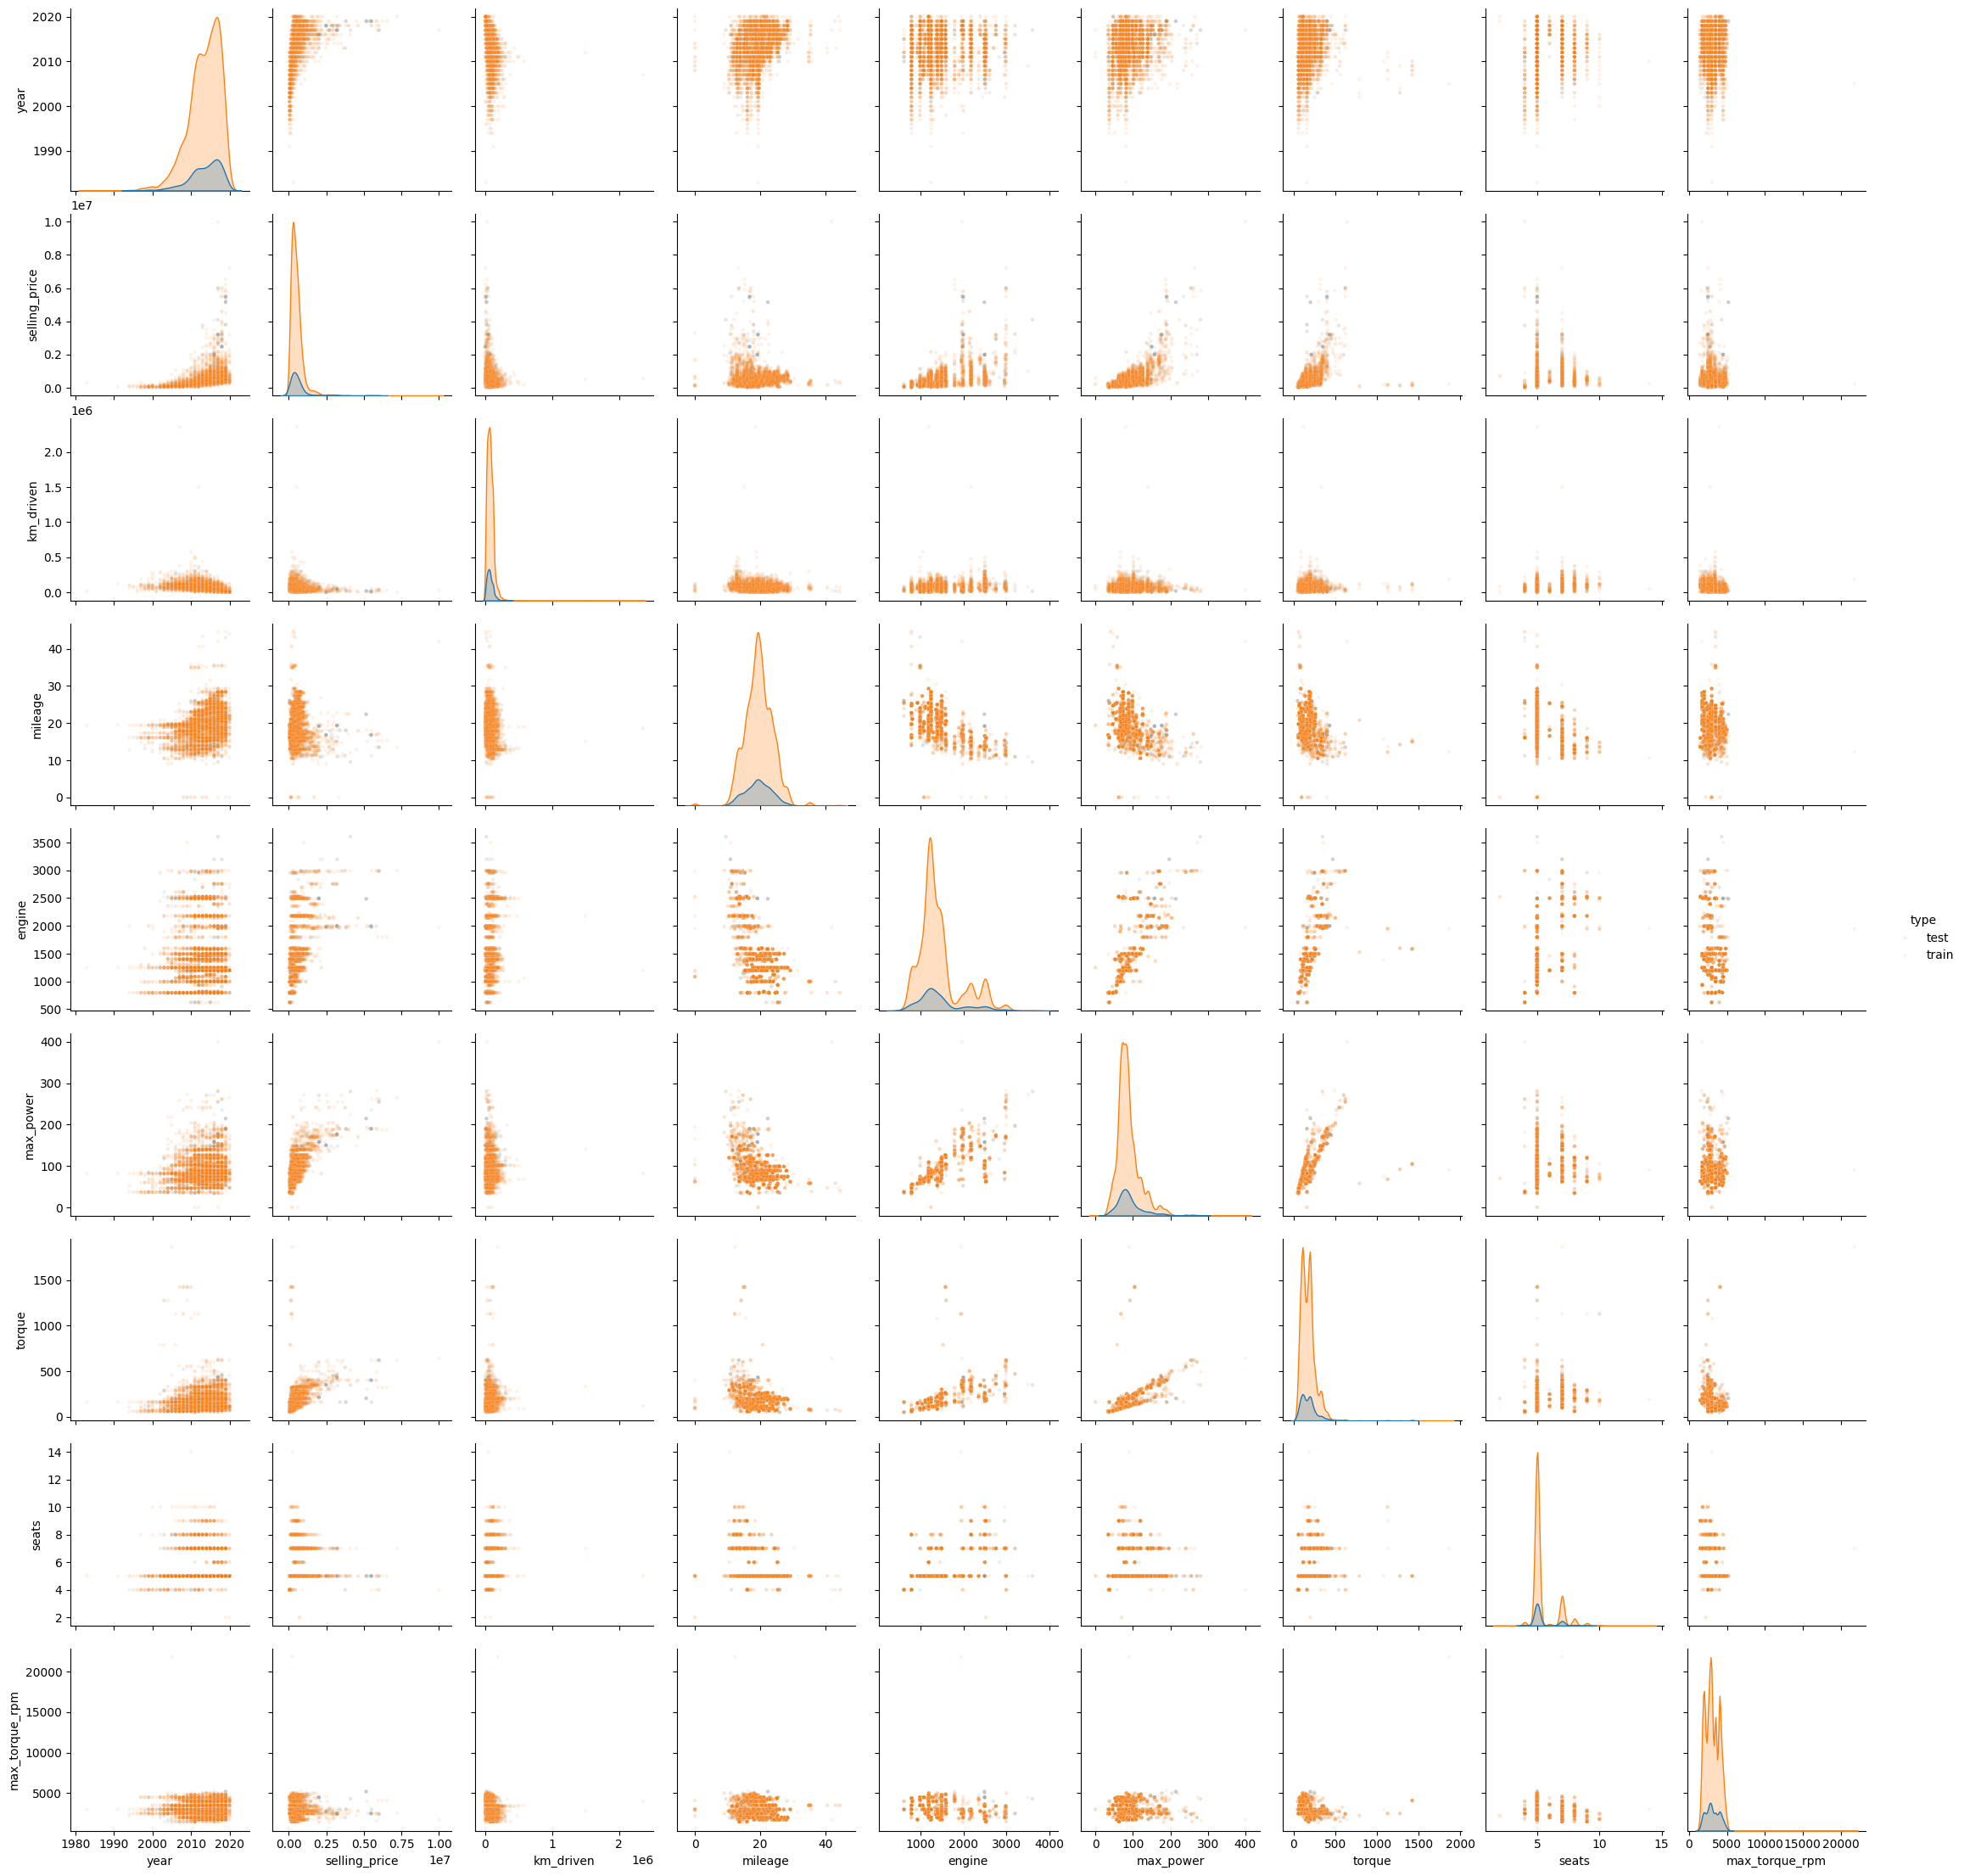

<Figure size 640x480 with 0 Axes>

In [35]:
sns.pairplot(df_to_plot, hue='type', diag_kind='kde', plot_kws = {'alpha': 0.1, 's': 10})
plt.show()
plt.savefig('pairplot.png')

`Можно заменить около линейную связь между selling_price и [max_power, torque, engine]`

`Сильную линеную связь можно заменить между engine и max_power и torque, что как будто даже логично`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

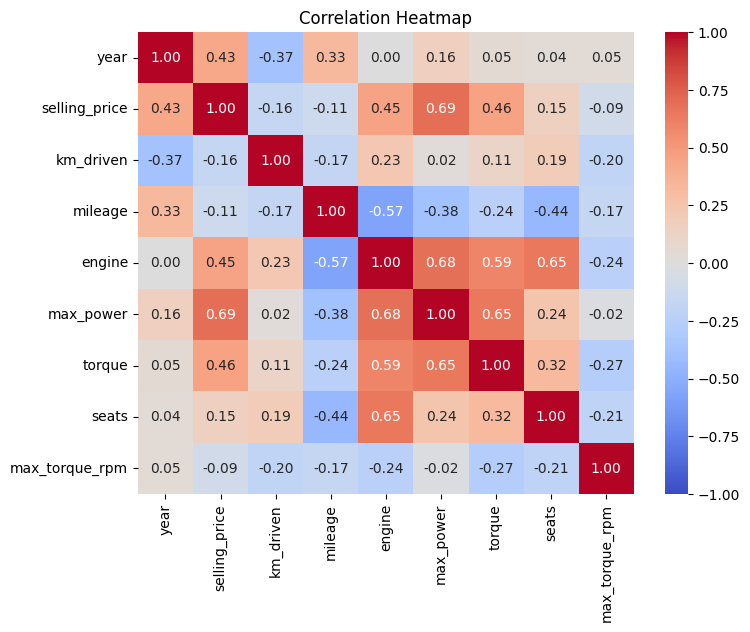

In [36]:
correlation_matrix = df_train.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Наиболее скореллированны оказались sellig_price и max_power`

`Наименее - engine и year`

`Корреляция year и km_driven -0.39. Как минимум отрицательная линеная зависимость есть, и можно сказать что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [37]:
def rank_data(x):
    sorted_indices = np.argsort(x)
    ranks = np.zeros_like(sorted_indices)
    ranks[sorted_indices] = np.arange(len(x)) + 1
    return ranks

def spearman_correlation(x, y):
    n = len(x)

    rank_x = rank_data(x)
    rank_y = rank_data(y)

    d = rank_x - rank_y

    spearman_corr = 1 - 6 * np.sum(d**2) / (n * (n**2 - 1))
    return spearman_corr

def spearman_correlation_matrix(df):
    num_cols = df.shape[1]
    corr_matrix = np.zeros((num_cols, num_cols))

    for i in range(num_cols):
        for j in range(num_cols):
            corr_matrix[i, j] = spearman_correlation(df.iloc[:, i], df.iloc[:, j])

    return corr_matrix

In [38]:
names = df_train.select_dtypes(include=[np.number]).columns

In [39]:
spearman_corr_matrix = spearman_correlation_matrix(df_train.select_dtypes(include=[np.number]))
spearman_corr_matrix = pd.DataFrame(spearman_corr_matrix, columns = names, index=names)

`Your answer here`

In [40]:
spearman_corr_lib_matrix = df_train.select_dtypes(include=[np.number]).corr(method='spearman')
spearman_corr_lib_matrix = pd.DataFrame(spearman_corr_lib_matrix, columns = names, index=names)

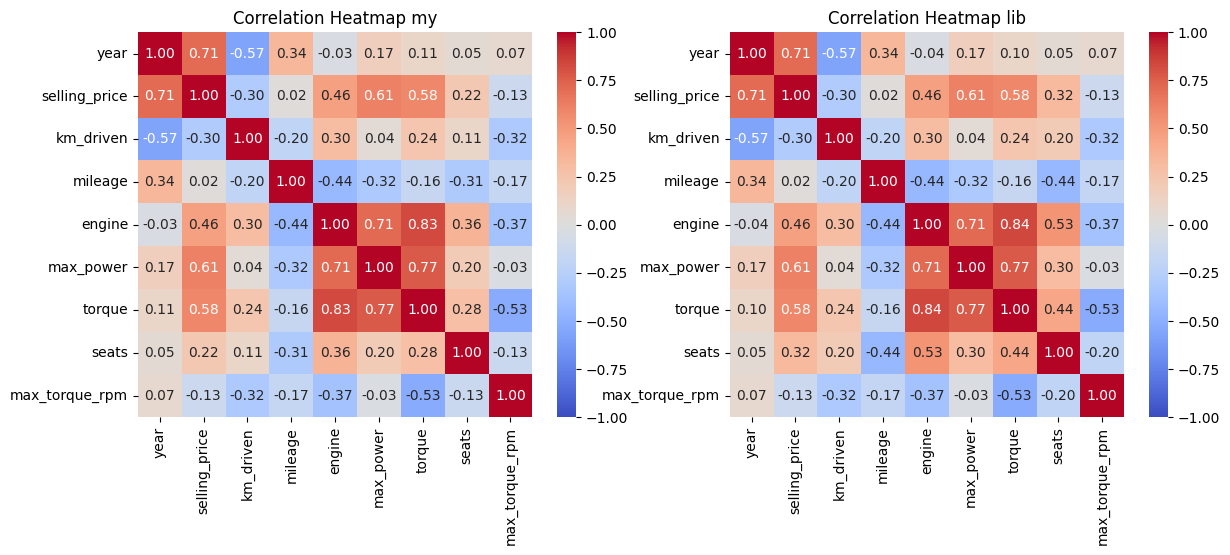

In [41]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
# plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap my')

plt.subplot(1, 2, 2)
# plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_lib_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap lib')
plt.show()

<Axes: >

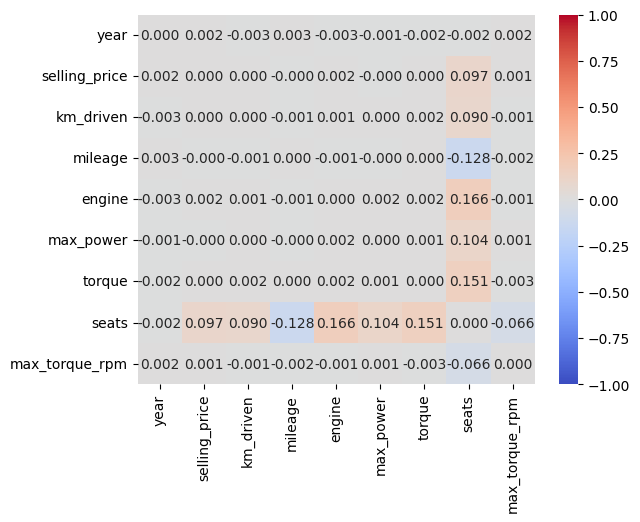

In [42]:
sns.heatmap(spearman_corr_lib_matrix - spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [43]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [44]:
df_train_num = df_train.select_dtypes(include=[np.number]).drop(['engine', 'seats'], axis=1)
df_test_num = df_test.select_dtypes(include=[np.number]).drop(['engine', 'seats'], axis=1)

In [45]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop('selling_price', axis = 1)

In [46]:
assert X_train.shape == (5840, 6)

In [47]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop('selling_price', axis = 1)

In [48]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n'+'-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 1.148e+11
------------------------------
R2
Train: 0.5994
------------------------------
MAPE
Train: 0.605


`Уже по значению R2 понятно, что модель не очень. Но метрика MAPE раскрывает нам, что модель ошибается в среднем на 60%`

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [50]:
def R2(y_true, y_pred):

  y_mean = np.mean(y_true)
  sse = np.sum((y_true - y_pred) ** 2)
  sst = np.sum((y_true - y_mean) ** 2)
  r2 = 1 - (sse / sst)

  return r2

$$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
`Числитель - это сумма квадратов остатков, которая показывает, насколько модель ошибается`

`Знаменатель - сумма квадратов при предсказании моделью всех значений средним`


### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [51]:
def adjusted_r2(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = R2(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adjusted_r2

In [52]:
print(f'my R2\nTrain: {R2(y_train, train_pred):.4}\n'+'-'*30)
print(f'adjusted R2\nTrain: {adjusted_r2(y_train, train_pred, X_train.shape[1]):.4}\n' + '-'*30)

my R2
Train: 0.5994
------------------------------
adjusted R2
Train: 0.599
------------------------------


`Чтобы предотвратить завышения стандартного R2 при увеличении количества признаков. Чтобы избежать переобучения и усложнения модели`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_s, y_train)
train_pred = lr.predict(X_train_s)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n'+'-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 1.148e+11
------------------------------
R2
Train: 0.5994
------------------------------
MAPE
Train: 0.605


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [54]:
coefficients = lr.coef_

feature_importance = pd.DataFrame({
    'признак': X_train.columns,
    'коэффициент': coefficients,
    'абсолютный коэффициент': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='абсолютный коэффициент', ascending=False)

In [55]:
feature_importance

,признак,коэффициент,абсолютный коэффициент
3,max_power,346171.107486,346171.107486
0,year,158096.779691,158096.779691
5,max_torque_rpm,-56971.604095,56971.604095
1,km_driven,-49743.557432,49743.557432
2,mileage,1828.814457,1828.814457
4,torque,1213.825175,1213.825175


`наиболее информативным оказался max_power`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train_s, y_train)
train_pred = lasso.predict(X_train_s)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n'+'-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 1.148e+11
------------------------------
R2
Train: 0.5994
------------------------------
MAPE
Train: 0.6047


In [57]:
coefficients = lasso.coef_

feature_importance = pd.DataFrame({
    'признак': X_train.columns,
    'коэффициент': coefficients,
    'абсолютный коэффициент': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='абсолютный коэффициент', ascending=False)

In [58]:
feature_importance

,признак,коэффициент,абсолютный коэффициент
3,max_power,346065.645395,346065.645395
0,year,158084.592540,158084.592540
5,max_torque_rpm,-56883.759237,56883.759237
1,km_driven,-49642.134901,49642.134901
2,mileage,1715.830613,1715.830613
4,torque,1167.708754,1167.708754


`Даже с большим alpha модель не занулила ни одного веса. Могу предположить что это из за значительной линеной связи между целевой переменной и независимыми. Мы пока рассматриваем только вещесвенные признаки, а их не так много, и потеря одного из них для модели так сильно сказывается на loss функции,  что увеличение alpha не заставляет ее зануть веса`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
%%time

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_s, y_train)

CPU times: user 236 ms, sys: 98.2 ms, total: 335 ms
Wall time: 4.18 s


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'alpha': 100, 'fit_intercept': True, 'selection': 'random'}

In [62]:
best_lasso = grid_search.best_estimator_

In [63]:
coefficients = best_lasso.coef_

feature_importance = pd.DataFrame({
    'признак': X_train.columns,
    'коэффициент': coefficients,
    'абсолютный коэффициент': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='абсолютный коэффициент', ascending=False)
feature_importance

,признак,коэффициент,абсолютный коэффициент
3,max_power,346044.490557,346044.490557
0,year,158093.136388,158093.136388
5,max_torque_rpm,-56882.230447,56882.230447
1,km_driven,-49641.385242,49641.385242
2,mileage,1705.590049,1705.590049
4,torque,1182.911561,1182.911561


In [64]:
train_pred = best_lasso.predict(X_train_s)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n'+'-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 1.148e+11
------------------------------
R2
Train: 0.5994
------------------------------
MAPE
Train: 0.6047


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
%%time
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False],
    'selection': ['cyclic', 'random']
}

elastic_net = ElasticNet()

grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_s, y_train)

CPU times: user 727 ms, sys: 72.3 ms, total: 799 ms
Wall time: 5.46 s


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.9, 'selection': 'cyclic'}

In [68]:
best_elastic = grid_search.best_estimator_

In [69]:
train_pred = best_elastic.predict(X_train_s)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n'+'-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 1.149e+11
------------------------------
R2
Train: 0.5993
------------------------------
MAPE
Train: 0.5993


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [70]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [71]:
def extract_brand(name):
    return name.split()[0]

In [72]:
def encode_brands(name):
  global df_train
  train_brands = df_train['name'].apply(extract_brand)
  popular_brands = train_brands.value_counts().head(10)
  if name in popular_brands:
    return name
  else:
    return 'other'

In [73]:
X_train_cat = pd.concat([X_train,  df_train.select_dtypes(include='object')], axis=1)
X_train_cat['name'] = X_train_cat['name'].apply(extract_brand).apply(encode_brands)

In [74]:
assert X_train_cat.shape == (5840, 11)

In [75]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,11,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [76]:
from sklearn.preprocessing import OneHotEncoder

def ohe(data):
  categorical_columns = data.select_dtypes(include=['object']).columns
  dummies = pd.get_dummies(data[categorical_columns], drop_first=True, dtype='int')
  df = pd.concat([data.drop(columns=categorical_columns), dummies], axis=1)
  return df

def ohe_seats(seats):
  seats = seats.astype('str')
  df = pd.get_dummies(seats, drop_first=True, dtype='int',  prefix='seats')
  return df

In [77]:
ohe_seats_df = ohe_seats(df_train['seats'])

In [78]:
X_train_cat = ohe(X_train_cat)

In [79]:
X_train_cat = pd.concat([X_train_cat, ohe_seats_df], axis=1)

In [80]:
X_test_cat = pd.concat([X_test,  df_test.select_dtypes(include='object')], axis=1)
X_test_cat['name'] = X_test_cat['name'].apply(extract_brand).apply(encode_brands)

ohe_seats_df = ohe_seats(df_test['seats'])
X_test_cat = ohe(X_test_cat)
X_test_cat = pd.concat([X_test_cat, ohe_seats_df], axis=1)

In [81]:
train_col = set(X_train_cat.columns)
test_col = set(X_test_cat.columns)

In [82]:
diff = train_col.symmetric_difference(test_col)

In [83]:
for col in diff:
    if col not in X_train_cat.columns:
        X_train_cat[col] = 0
    if col not in X_test_cat.columns:
        X_test_cat[col] = 0

In [84]:
desired_order = X_train_cat.columns.tolist()
X_test_cat = X_test_cat.reindex(columns=desired_order)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`необходимо следить, чтобы категорий было не слишком много, чтобы после ohe не образовалось огромное количество столбцов`

`Мы удаляем один столбец чтобы избежать линейной зависимости между столбцами, упрощает модель`

`да, корректно, даже иногда необходимо для стабольности модели и ее простоты`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='r2', n_jobs=-1)

grid_search.fit(X_train_cat, y_train)

best_ridge = grid_search.best_estimator_

In [86]:
train_pred = best_ridge.predict(X_train_cat)

print(f'MSE\nTrain: {MSE(y_train, train_pred):.4}\n' + '-'*30)
print(f'R2\nTrain: {r2_score(y_train, train_pred):.4}\n' + '-'*30)
print(f'MAPE\nTrain: {MAPE(y_train, train_pred):.4}')

MSE
Train: 8.82e+10
------------------------------
R2
Train: 0.6923
------------------------------
MAPE
Train: 0.5257


`Да. качество улучшить удалось`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [87]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [88]:
def business_metrics(y_true, y_pred):
  abs_diff = np.abs(y_true - y_pred)
  tolerance = 0.1 * y_true
  metric = (abs_diff <= tolerance).mean()
  return metric


train_pred_lr = lr.predict(X_train_s)
train_pred_lasso = best_lasso.predict(X_train_s)
train_pred_ridge = best_ridge.predict(X_train_cat)

print(f'LogisticRegression {business_metrics(train_pred_lr, y_train):.4}')
print(f'Lasso {business_metrics(train_pred_lasso, y_train):.4}')
print(f'Ridge {business_metrics(train_pred_ridge, y_train):.4}')

LogisticRegression 0.2296
Lasso 0.2298
Ridge 0.2305


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [89]:
def your_business_metrics(y_true, y_pred):
  errors = y_true - y_pred
  weights = np.where(errors > 0, 0.9, 0.1)
  wmse = np.mean(weights * errors**2)
  max_error = np.mean(errors**2)
  normalized_metric = wmse/MSE(y_true, y_pred)

  return normalized_metric

In [90]:
print(f'Mean model {your_business_metrics(np.mean(y_train)*np.ones_like(y_train), y_train):.3}')

Mean model 0.227


In [91]:
print(f'LogisticRegression {your_business_metrics(train_pred_lr, y_train):.3}')
print(f'Lasso {your_business_metrics(train_pred_lasso, y_train):.3}')
print(f'Ridge {your_business_metrics(train_pred_ridge, y_train):.3}')

LogisticRegression 0.306
Lasso 0.306
Ridge 0.348


In [92]:
test_pred_lasso = best_lasso.predict(X_test_s)

In [93]:
print(f'Lasso_test {business_metrics(test_pred_lasso, y_test):.3}')

Lasso_test 0.248


## Тестирование

In [94]:
test_pred_lr = lr.predict(X_test_s)
print(f'LogisticRegression {business_metrics(test_pred_lr, y_test):.3}')

LogisticRegression 0.248


In [95]:
import joblib

joblib.dump(train_medians, 'train_medians.pkl')
joblib.dump(lr, 'model.pkl')
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>